In [1]:
import os
from keras_preprocessing.image import load_img, img_to_array
from tensorflow.keras import backend as K
import tensorflow.keras as tk
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist, fashion_mnist,cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
ls data/

In [ ]:
X = []
y = []
classes = ['Blue_mug', 'mobile', 'Red_mug', 'Rose', 'empty', 'apple', 'biketool_mm', 'bodycream_test_ss', 'bodycream_train_ss', 'Bottle_gk',
          'bottle_mw_test', 'bottle_mw_train', 'bottle_rbk','bottle_test_ss', 'bottle_train_ss', 'chris_bottle', 'chris_empty', 'crista_bottle',
          'empty_crista', 'helge_scarf', 'helge_empty', 'plant_rbk', 'moritz_bottle','lighter_mm','him_teacup', 'helge_mouse',
          'headphone_rbk','empty_train_ss', 'empty_train_ss', 'empty_crista', 'Naz_bottle']

base_path = '.\\data\\'

for i, target in enumerate(classes):
    files = os.listdir(base_path+target)
    for file in files:
        # check if the file is a valid image file
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            full_path=  base_path+target+ f'\\{file}'
            print(full_path)
            img =  load_img(full_path, target_size=(224, 224))
            # append the array to X
            img_array = img_to_array(img)
            X.append(img_array)
            y.append(i)

X = np.array(X)
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]


In [ ]:
# Split the data into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Convert labels to one-hot encoding
num_classes = len(classes)
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print('Test accuracy:', test_acc)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
history.history

In [ ]:
# Plot loss and accuracy curves
pd.DataFrame(data=history.history).plot()
plt.grid(True)
plt.xlabel('epochs')

# To feed the images in a CNN we need to reshape our X data to the format 
# (batch/sample, width, heigth, channels):



In [ ]:
#Xtrain = X_train.reshape(1552, 28, 28,3)
#Xtest = X_test.reshape(389, 28, 28,3)

In [ ]:
plt.imshow(X_train[0].astype('uint8'))

In [ ]:
# plot the train images  with the labels
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5, 5, i+1,title=f'Number: {y_train[i]}')
    plt.imshow(Xtrain[i].astype('uint8'),cmap='gray')
    plt.axis('off')

In [ ]:
# The labels are 10 numbers (0...9) we transform it into 10 classes 
# ytrain, ytest from number to categorical/dummies

ytrain_cat = to_categorical(y_train)
ytest_cat = to_categorical(y_train)
# Train the model

In [ ]:
ytrain_cat.shape

In [ ]:
ytrain_cat

In [ ]:
# from categorical to number
np.argmax(ytrain_cat,axis=1),np.argmax(ytest_cat,axis=1)

In [ ]:
print('After preprocessing also y:\n')
print('Xtrain shape:', Xtrain.shape)
print(Xtrain.shape[0], 'train samples')
print(Xtest.shape[0], 'test samples')
print(Xtrain[0].shape, 'image shape')
print('ytrain cat shape:', ytrain_cat.shape)

## LeNet-5 in Keras

Implement LeNet-5 architecture from above.

Use relu activation function for convolutional and fully-connected (dense) layers, and softmax for the output layer.

In [ ]:
import keras.backend as K
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

K.clear_session()

# Load dataset
# Assuming Xtrain and ytrain are already loaded

# Convert ytrain to one-hot encoded format
ytrain_cat = to_categorical(y_train)

# Define model architecture
model =  tf.keras.Sequential([
    # Convolutional layers
    Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='valid',
           activation='relu', input_shape=(28,28,3),
           kernel_initializer='glorot_normal', bias_initializer='zeros'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid',
           activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    # Fully connected layers
    Flatten(),
    Dense(units=120, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'),
    Dense(units=84, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'),
    Dense(units=10, activation='softmax')
])

# Print model summary
model.summary()

# Compile the model


In [ ]:


# Split the data into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Convert labels to one-hot encoding
num_classes = len(classes)
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2), strides=(2,2), padding = "valid"))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2,2), padding = "valid"))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print('Test accuracy:', test_acc)


In [ ]:
print('Test accuracy:', test_acc)
print('Test loss', test_loss)

In [ ]:
print(Xtrain.shape)
print(model.input_shape)

## Examine the model

In [ ]:
history.history

In [ ]:
# Plot loss and accuracy curves
pd.DataFrame(data=history.history).plot()
plt.grid(True)
plt.xlabel('epochs')

In [ ]:
from IPython.display import Image
from tensorflow.keras.utils import plot_model

# Visualize the layers of the model in 2D
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True, rankdir='TB', dpi=96)

# Display the plot in Jupyter Notebook
Image(filename='model_plot.png')

In [ ]:
## Train the model with Tensorboard
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)
history = model.fit(Xtrain, ytrain_cat, batch_size=28, epochs=10, validation_split=0.2, callbacks=[tensorboard])

In [ ]:
!kill 6006 

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Start TensorBoard
%tensorboard --logdir logs
#%reload_ext tensorboard

In [ ]:

# Visualize the model architecture
plot_model(model, show_shapes=True, show_layer_names=True)


 ## Pre-trained Networks
 Resnet50
 
  Initialize the model
   

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50,decode_predictions,preprocess_input

In [ ]:
model = ResNet50()

In [ ]:
model.summary()

In [ ]:
from glob import glob

def batch_prediction(base_path):
    image_paths = glob(base_path + '/*.jpg')
    num_images = min(len(image_paths), 6) # ensure that at most 6 subplots are created
    for i in range(num_images):
        img_path = image_paths[i]
        # read and preprocess
        pic = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
        numpy_image = np.array(pic)
        image_batch = np.expand_dims(numpy_image, axis=0)
        processed_image = preprocess_input(image_batch)
        
        # predict
        predictions = model.predict(processed_image)
        label = decode_predictions(predictions)
        
        # plot
       


In [ ]:
import matplotlib.pyplot as plt
from keras.applications.imagenet_utils import decode_predictions

def batch_prediction(base_path, model):
    
    image_paths = glob(base_path + '/*.png')

    num_images = max(min(len(image_paths), 6), 1) # ensure that at least one subplot is created

    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):

        img_path = image_paths[i]

        print(img_path)

        # read and preprocess

        pic = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

        numpy_image = np.array(pic)

        image_batch = np.expand_dims(numpy_image, axis=0)

        processed_image = preprocess_input(image_batch)

        

        # predict

        predictions = model.predict(processed_image)

        label = decode_predictions(predictions)

        label = label[0][0] # get the top prediction

        

        # plot

        axs[i].imshow(pic)

        axs[i].axis('off')

        axs[i].set_title(label[1] + ': ' + str(round(label[2]*100, 2)) + '%')

        

        plt.show()

        num_images = max(min(len(image_paths), 6), 1)

        print(f"Number of images to display: {num_images}")

        fig, axs = plt.subplots(1, num_images, figsize=(15, 5))

In [ ]:

batch_prediction(base_path, model)


In [3]:
from keras.applications.mobilenet import MobileNet, decode_predictions, preprocess_input


In [ ]:
from keras.applications.mobilenet import MobileNet, decode_predictions, preprocess_input

# resize images to 224x224
X_resized = tf.image.resize(X, (224, 224))
mdl = MobileNet()  # download (on `ImageNet` pretrained) model 
# predict on resized images
pred = mdl.predict(X_resized)
from PIL import Image
import numpy as np

# Load the image

# Resize the image to 224x224
image = image.resize((224, 224))

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype('float32') / 255.

# Subtract the mean RGB values of ImageNet dataset from the image array
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image_array = (image_array - mean) / std

# Add a batch dimension to the image array
image_array = np.expand_dims(image_array, axis=0)

print(pred.shape)



In [ ]:
pred = mdl.predict(X)
pred.shape

In [ ]:
decode_predictions(pred) # make these preds "human-readable"

#### Check what is really in the image

In [ ]:
plt.imshow(img);

In [ ]:
model.summary()

In [ ]:
tk.preprocessing.i

In [4]:
# define the preprocessing function that should be applied to all images
data_gen = tk.preprocessing.image.ImageDataGenerator(   # loads data in batches from disk
    preprocessing_function=preprocess_input,
    # fill_mode='nearest',
    rotation_range=20,                               # rotate image by a random degree between -20 and 20
    # width_shift_range=0.2,                         # shift image horizontally 
    # height_shift_range=0.2,                        # shift image vertically 
    # horizontal_flip=True,                          # randomly flip image horizontally
    zoom_range=0.5,                                  # apply zoom transformation using zoom factor between 0.5 and 1.5
    # shear_range=0.2                                # shear rotates pics, but makes them be in trapezoids (as opposed to squares)
    validation_split=0.2
)

In [5]:
classes = ['Blue_mug', 'mobile', 'Red_mug', 'Rose', 'empty', 'apple', 'biketool_mm', 'bodycream_test_ss', 'bodycream_train_ss', 'Bottle_gk',
          'bottle_mw_test', 'bottle_mw_train', 'bottle_rbk','bottle_test_ss', 'bottle_train_ss', 'chris_bottle', 'chris_empty', 'crista_bottle',
          'empty_crista', 'helge_scarf', 'helge_empty', 'plant_rbk', 'moritz_bottle','lighter_mm','him_teacup', 'helge_mouse',
          'headphone_rbk','empty_train_ss', 'Naz_bottle']

base_path = '.\\data\\'

In [6]:
# a generator that returns batches of X and y arrays
train_data_gen = data_gen.flow_from_directory(      # points to dir where data lives
        directory=base_path,
        class_mode="categorical",
        classes=classes,
        batch_size=64,
        target_size=(224, 224),
    subset='training'
)

Found 3275 images belonging to 29 classes.


In [7]:
val_data_gen = data_gen.flow_from_directory(
        directory=base_path,
        class_mode="categorical",
        classes=classes,
        batch_size=64,
        target_size=(224, 224),
    subset='validation'
)

Found 811 images belonging to 29 classes.


In [ ]:
classes

In [ ]:
train_data_gen.class_indices

## Create CNN Model as Base Model

### 1. Select the convolutional base 

#### Using MobileNet pretrained network for transfer learning

In [8]:
K.clear_session()
base_model = MobileNet(
    weights='imagenet',
    include_top=False,                          # keep convolutional layers only
    input_shape=(224, 224, 3)
)

In [9]:
base_model.summary()                            # as expected...see above

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

#### Freeze the weights

In [10]:
base_model.trainable = False  # we don't want to train the base model, since this would destroy filters

#### Build your "individualized" architecture for "top-layers"
###### Add your own dense layers on top

In [11]:
len(classes)

29

In [12]:
model = tk.models.Sequential()
model.add(base_model)
model.add(Flatten())  
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(classes), activation='softmax')) # TODO; Final layer with a length of 2, and softmax activation

In [13]:
model.summary()                 # Note "non-trainable" params...

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 100)               5017700   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 29)                2929      
                                                                 
Total params: 8,249,493
Trainable params: 5,020,629
Non-trainable params: 3,228,864
______________________________________

### 4. Compile and train!

In [14]:
model.compile(optimizer=tk.optimizers.Adam(learning_rate=0.001),
              loss=tk.losses.categorical_crossentropy, #TODO: why not binary x-entropy?
              metrics=[tk.metrics.categorical_accuracy])

# observe the validation loss and stop when it does not improve after 3 iterations
callback = tk.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.05,     # the minimum expected change in the metric used in order to be seen as an improvement
    patience=3,         # number of epochs with no improvement needed for the model to stop
    restore_best_weights=True,
    mode='min'
    )

In [15]:
history = model.fit(train_data_gen,
          verbose=2, 
          callbacks=[callback],
          epochs=20,
          validation_data=val_data_gen
          )

Epoch 1/20
52/52 - 157s - loss: 2.6479 - categorical_accuracy: 0.4769 - val_loss: 0.7217 - val_categorical_accuracy: 0.7928 - 157s/epoch - 3s/step
Epoch 2/20
52/52 - 131s - loss: 0.8767 - categorical_accuracy: 0.7316 - val_loss: 0.4299 - val_categorical_accuracy: 0.8878 - 131s/epoch - 3s/step
Epoch 3/20
52/52 - 135s - loss: 0.5972 - categorical_accuracy: 0.8180 - val_loss: 0.2748 - val_categorical_accuracy: 0.9346 - 135s/epoch - 3s/step
Epoch 4/20
52/52 - 129s - loss: 0.4658 - categorical_accuracy: 0.8501 - val_loss: 0.3129 - val_categorical_accuracy: 0.9174 - 129s/epoch - 2s/step
Epoch 5/20
52/52 - 127s - loss: 0.3839 - categorical_accuracy: 0.8763 - val_loss: 0.2261 - val_categorical_accuracy: 0.9297 - 127s/epoch - 2s/step
Epoch 6/20
52/52 - 153s - loss: 0.3413 - categorical_accuracy: 0.8950 - val_loss: 0.1456 - val_categorical_accuracy: 0.9568 - 153s/epoch - 3s/step
Epoch 7/20
52/52 - 177s - loss: 0.2869 - categorical_accuracy: 0.9075 - val_loss: 0.1794 - val_categorical_accuracy: 0

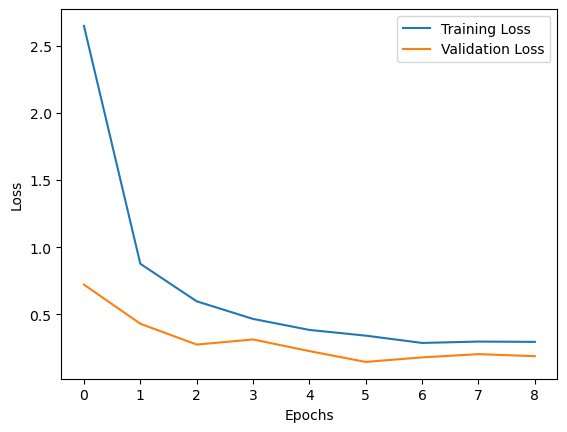

In [16]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();